# Capstone Regression Project

## Business Understanding

Real Estate group wants to develop housing residents for common (middle class) people to obtain minimize profit, the management of the company require analiyse the sale price factor of house without making too pricey for the middle class people. This analise is help to identify the features which can affect tghe price of house for this analysis we using Kind countgry Washington data for the year 2021-2022 as case study.  

## Data Understanding

The dataset contains the about the ageing of house sold in the year 2021-2022. Also it shows in which year house was  built and year of renovated. Contains the sqft of living area, bedrooms, bathrooms...etc. All the house has identification number and each were categorized with grade and location. 

## Data Preparation

we used library like pandas, numpy for coding and cleaning the data. For visulization used matplotlib, seanbon, histgram and for statical data we used statsmodels library


### Loading the Data

In [1]:
# import require library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

### Data Exploration

In [2]:
# read the csv file from data
kchd_df = pd.read_csv("data/kc_house_data.csv")


In [3]:
# extract how many column, datatype and missing value
kchd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
kchd_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
kchd_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
kchd_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Cleaning

In [7]:
# rename the date column in datetime formate 
renmdate={'date':'selldate'}
kchd_df.rename(columns=renmdate, inplace=True)

# formate the date column (year first)
kchd_df.selldate = kchd_df.selldate.apply(lambda x: pd.to_datetime(x, yearfirst=True))


In [8]:
# create column as 'yr_age'
kchd_df['yr_age']=np.where(kchd_df['yr_renovated']!=0, kchd_df.selldate.apply(lambda x:x.year)-kchd_df['yr_renovated'],
kchd_df['selldate'].apply(lambda x:x.year)-kchd_df['yr_built'])
kchd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   selldate       30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [9]:
#drop column 'id' 
kchd_df.drop(labels='id', axis=1, inplace=True)
kchd_df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_age
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


In [10]:
# create column 'zipcode'
kchd_df['zipcode']= kchd_df.address.apply(lambda x: x[-20:-15])
kchd_df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_age,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027


In [11]:
##Dropping Missing Value

In [12]:
kchd_df.isna().sum()/kchd_df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
yr_age           0.000000
zipcode          0.000000
dtype: float64

In [13]:
kchd_df.dropna(subset=['heat_source','sewer_system'],axis=0,inplace=True)

In [14]:
kchd_df.isna().sum()/kchd_df.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
yr_age           0.0
zipcode          0.0
dtype: float64

In [15]:
kchd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30111 non-null  datetime64[ns]
 1   price          30111 non-null  float64       
 2   bedrooms       30111 non-null  int64         
 3   bathrooms      30111 non-null  float64       
 4   sqft_living    30111 non-null  int64         
 5   sqft_lot       30111 non-null  int64         
 6   floors         30111 non-null  float64       
 7   waterfront     30111 non-null  object        
 8   greenbelt      30111 non-null  object        
 9   nuisance       30111 non-null  object        
 10  view           30111 non-null  object        
 11  condition      30111 non-null  object        
 12  grade          30111 non-null  object        
 13  heat_source    30111 non-null  object        
 14  sewer_system   30111 non-null  object        
 15  sqft_above     3011

## Modeling

### Baseline Model

In [16]:
# Create baseline model Predictors and target
preds_cols=[x for x in kchd_df.columns if x not in['price','waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','selldate','zipcode','address']]
preds_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_age']

In [17]:
preds=kchd_df[preds_cols]
target=kchd_df.price

In [18]:
y=target
X=preds

model=sm.OLS(y,sm.add_constant(X))
results=model.fit()

results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1531.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:11   Log-Likelihood:            -4.4734e+05
No. Observations:               30111   AIC:                         8.947e+05
Df Residuals:                   30096   BIC:                         8.948e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.264e+06   1.57e+06     -3.345      0.001   -8.35e+06   -2.18e+06
bedrooms      -1.669e+05   5461.573    -30.555      0.000   -1.78e+05   -1.56e+05
bathrooms      1.411e+05   8062.571     17.497      0.000    1.25e+05    1.57e+05
sqft_living     335.7764     18.281     18.367      0.000     299.944     371.609
sqft_lot         -0.0916      0.068     -1.353      0.176      -0.224       0.041
floors        -1526.3791   9902.358     -0.154      0.877   -2.09e+04    1.79e+04
sqft_above      287.9607     18.662     15.430      0.000     251.382     324.540
sqft_basement   162.6750     13.690     11.883      0.000     135.843     189.507
sqft_garage    -145.2075     19.089     -7.607      0.000    -182.622    -107.793
sqft_patio      260.6295     17.941     14.527      0.000     225.464     295.795
yr_built       2501.8038    774.053      3.232      0.001     984.627    4018.981
yr_renovated    221.2089     24.497      9.030      0.000     173.194     269.223
lat            3.162e+04   4281.656      7.384      0.000    2.32e+04       4e+04
long           1.167e+04   1076.336     10.844      0.000    9561.854    1.38e+04
yr_age         5941.4099    778.619      7.631      0.000    4415.284    7467.536
==============================================================================
Omnibus:                    43095.522   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48118495.038
Skew:                           8.069   Prob(JB):                         0.00
Kurtosis:                     198.173   Cond. No.                     2.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-QUARE score is 0.416 and there is so many column p-value is more than 0.5 which we have to clean the outliner of the cloumn.

Improve upon the baseline model

Model Iteration

In [19]:
## Use pd.get dummies to dummify categorial variables
cat_columns = ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system']
dummy_kchd=pd.get_dummies(data=kchd_df, columns=cat_columns, drop_first=True)

In [20]:
dummy_kchd.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'yr_age',
       'zipcode', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [21]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
yr_age             int64
dtype: object

In [22]:
# running our model with dummified predictors
X=dummy_kchd.drop(labels=['selldate','price','zipcode','address'],axis=1)
y=dummy_kchd.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()

results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     754.6
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:11   Log-Likelihood:            -4.4405e+05
No. Observations:               30111   AIC:                         8.882e+05
Df Residuals:                   30065   BIC:                         8.886e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.623e+06   1.42e+06     -1.852      0.064    -5.4e+06    1.52e+05
bedrooms                        -5.647e+04   5166.765    -10.929      0.000   -6.66e+04   -4.63e+04
bathrooms                        9.666e+04   7389.731     13.080      0.000    8.22e+04    1.11e+05
sqft_living                        99.8336     16.921      5.900      0.000      66.667     133.000
sqft_lot                            0.2823      0.065      4.371      0.000       0.156       0.409
floors                          -5.528e+04   9295.295     -5.947      0.000   -7.35e+04   -3.71e+04
sqft_above                        212.8044     17.227     12.353      0.000     179.039     246.570
sqft_basement                     126.6683     12.757      9.929      0.000     101.664     151.673
sqft_garage                      -179.4730     17.727    -10.125      0.000    -214.218    -144.728
sqft_patio                        135.9421     16.639      8.170      0.000     103.330     168.555
yr_built                         1497.4521    696.162      2.151      0.031     132.945    2861.960
yr_renovated                      170.8073     22.095      7.731      0.000     127.501     214.114
lat                                3.3e+04   3845.633      8.580      0.000    2.55e+04    4.05e+04
long                             8601.5715    969.715      8.870      0.000    6700.889    1.05e+04
yr_age                           4369.4434    704.838      6.199      0.000    2987.931    5750.956
waterfront_YES                   7.502e+05   3.29e+04     22.769      0.000    6.86e+05    8.15e+05
greenbelt_YES                   -3649.4669   2.28e+04     -0.160      0.873   -4.83e+04     4.1e+04
nuisance_YES                     5.488e+04   9550.440      5.746      0.000    3.62e+04    7.36e+04
view_EXCELLENT                   6.253e+05   3.35e+04     18.642      0.000     5.6e+05    6.91e+05
view_FAIR                        1.783e+05   4.38e+04      4.068      0.000    9.24e+04    2.64e+05
view_GOOD                       -1005.5181   2.52e+04     -0.040      0.968   -5.05e+04    4.85e+04
view_NONE                       -3.677e+04   1.51e+04     -2.427      0.015   -6.65e+04   -7076.093
condition_Fair                  -8.554e+04   4.19e+04     -2.043      0.041   -1.68e+05   -3466.265
condition_Good                   3.574e+04   9123.261      3.918      0.000    1.79e+04    5.36e+04
condition_Poor                  -1.062e+05   8.22e+04     -1.293      0.196   -2.67e+05    5.48e+04
condition_Very Good              9.607e+04   1.29e+04      7.437      0.000    7.07e+04    1.21e+05
grade_11 Excellent               8.074e+05   3.53e+04     22.865      0.000    7.38e+05    8.77e+05
grade_12 Luxury                  1.822e+06   5.98e+04     30.450      0.000     1.7

In [23]:
#data shows there is 53% coefficient and there is so many column p-value is greater than 0.05
# need to remove some column outliner to reduce p value and increase the coefficent with independand variable.

<AxesSubplot:>

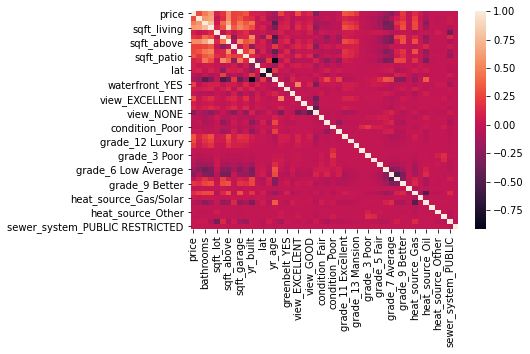

In [24]:
import seaborn as sns
sns.heatmap(dummy_kchd.corr())

In [25]:
# its show the positive correlation with dependand all variable
# we have to do data cleaning for increase zscore

Handling Ouliers

## Visualisation##
1. Scatter plot : visualized the relationship between two variables.
2. Box Plot: gives you information about the quantiles of your data, and generally an itdea of the rage of your data.
3. Histagram : show you the distribution of frequancies or counts.
4. QQ plot: allow you to check for the normality of your residuals and gives reference to outliers as well.

<AxesSubplot:>

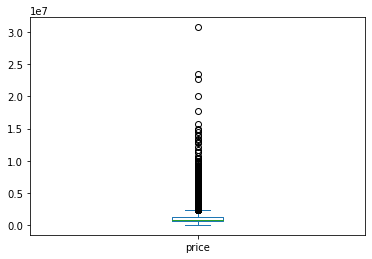

In [26]:
# visulization variable outlier through boxplot.
kchd_df['price'].plot(kind= 'box')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

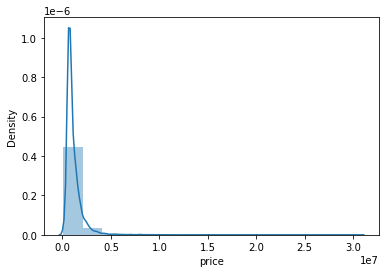

In [27]:
sns.distplot(kchd_df.price, bins=15, kde=True)

In [28]:
# check the data with correction each other
kchd_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_age
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872,43.539172
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073,31.300361
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075,17.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790,41.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394,65.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,122.000000


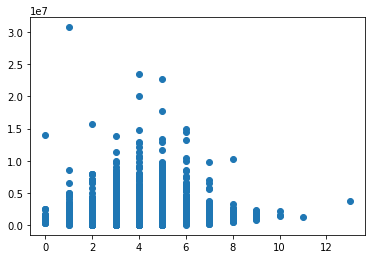

In [29]:
plt.scatter(x=kchd_df.bedrooms, y=kchd_df.price)


In [30]:
#clean the data
kchd_df.condition.value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [31]:
kchd_df.condition = kchd_df.condition.replace({'Good':'Above Average', 'Very Good':'Above Average','Fair':'Below Average','Poor':'Below Average'})

In [32]:
kchd_df.condition.value_counts()

Average          18515
Above Average    11310
Below Average      286
Name: condition, dtype: int64

In [33]:
# checking the all column dataframe
kchd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30111 non-null  datetime64[ns]
 1   price          30111 non-null  float64       
 2   bedrooms       30111 non-null  int64         
 3   bathrooms      30111 non-null  float64       
 4   sqft_living    30111 non-null  int64         
 5   sqft_lot       30111 non-null  int64         
 6   floors         30111 non-null  float64       
 7   waterfront     30111 non-null  object        
 8   greenbelt      30111 non-null  object        
 9   nuisance       30111 non-null  object        
 10  view           30111 non-null  object        
 11  condition      30111 non-null  object        
 12  grade          30111 non-null  object        
 13  heat_source    30111 non-null  object        
 14  sewer_system   30111 non-null  object        
 15  sqft_above     3011

In [34]:
# splite the address with zipcode
kchd_df.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

In [35]:
kchd_df['address'].iloc[0].split(', ')[2].split()[-1]

'98055'

In [36]:
kchd_df['zipcode'] = kchd_df['address'].apply(lambda x: x.split(', ')[2].split()[-1])
kchd_df['zipcode']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcode, Length: 30111, dtype: object

In [37]:
kchd_df['zipcode'].nunique()

400

In [38]:
from bs4 import BeautifulSoup
import requests

In [39]:
resp =requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [40]:
soup = BeautifulSoup(resp.content)
soup


<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

In [41]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')
a_tags

[<a href="/wa/king/">Data</a>,
 <a href="/counties/cities,cfips,033,c,king.cfm">Cities</a>,
 <a href="/maps/countymap,cfips,033,c,king.cfm">Map</a>,
 <a href="/zip-codes/countyzips,scfips,53033,c,king.cfm">ZIP Codes</a>,
 <a href="/features/countyfeatures,scfips,53033,c,king.cfm">Features</a>,
 <a href="/schools/sorted-by-county,n,king.cfm">Schools</a>,
 <a href="/land/county-land-and-farms,scfips,53033,c,king.cfm">Land</a>,
 <a href="data,zipcode,98001.cfm">98001</a>,
 <a href="data,zipcode,98002.cfm">98002</a>,
 <a href="data,zipcode,98003.cfm">98003</a>,
 <a href="data,zipcode,98004.cfm">98004</a>,
 <a href="data,zipcode,98005.cfm">98005</a>,
 <a href="data,zipcode,98006.cfm">98006</a>,
 <a href="data,zipcode,98007.cfm">98007</a>,
 <a href="data,zipcode,98008.cfm">98008</a>,
 <a href="data,zipcode,98010.cfm">98010</a>,
 <a href="data,zipcode,98011.cfm">98011</a>,
 <a href="data,zipcode,98014.cfm">98014</a>,
 <a href="data,zipcode,98019.cfm">98019</a>,
 <a href="data,zipcode,98022.cf

In [42]:
zipcodes = [a.text for a in a_tags[8:131]]
zipcodes

['98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98047',
 '98051',
 '98052',
 '98053',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98101',
 '98102',
 '98103',
 '98104',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98121',
 '98122',
 '98125',
 '98126',
 '98131',
 '98133',
 '98134',
 '98136',
 '98144',
 '98146',
 '98148',
 '98154',
 '98155',
 '98158',
 '98161',
 '98164',
 '98166',
 '98168',
 '98174',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 '98251',
 '98354',
 '98422',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98050',
 '98062',
 '98063',
 '98064',
 '98068',
 '98071',
 '98073',
 '98083',
 '98089',


In [43]:
kchd_df.shape

(30111, 26)

In [44]:
kchd_df1 = kchd_df.loc[kchd_df['zipcode'].isin(zipcodes)]
kchd_df1

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_age,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,100,98103
30151,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,10,98116
30152,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,27,98122
30153,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,16,98055


In [45]:
kchd_df1.shape

(28549, 26)

In [46]:
kchd_df1['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98112', '98034', '98056', '98059', '98005', '98040',
       '98014', '98106', '98029', '98122', '98003', '98117', '98042',
       '98119', '98065', '98022', '98072', '98058', '98108', '98115',
       '98074', '98105', '98024', '98146', '98109', '98102', '98028',
       '98188', '98177', '98075', '98010', '98148', '98047', '98032',
       '98070', '98051', '98288', '98354', '98050', '98251', '98224',
       '98422'], dtype=object)

<AxesSubplot:xlabel='zipcode'>

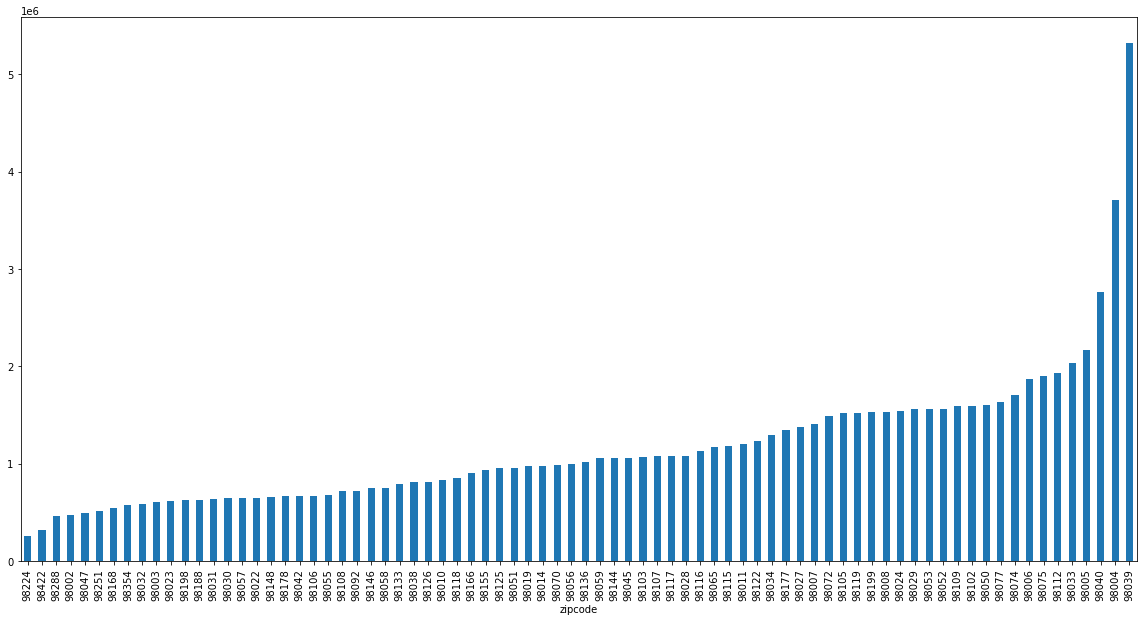

In [47]:
plt.figure(figsize = (20,10))
kchd_df1.groupby(kchd_df1.zipcode).price.mean().sort_values(ascending=True).plot(kind='bar')

In [48]:
kchd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28549 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       28549 non-null  datetime64[ns]
 1   price          28549 non-null  float64       
 2   bedrooms       28549 non-null  int64         
 3   bathrooms      28549 non-null  float64       
 4   sqft_living    28549 non-null  int64         
 5   sqft_lot       28549 non-null  int64         
 6   floors         28549 non-null  float64       
 7   waterfront     28549 non-null  object        
 8   greenbelt      28549 non-null  object        
 9   nuisance       28549 non-null  object        
 10  view           28549 non-null  object        
 11  condition      28549 non-null  object        
 12  grade          28549 non-null  object        
 13  heat_source    28549 non-null  object        
 14  sewer_system   28549 non-null  object        
 15  sqft_above     2854

In [49]:
kchd_df1['bedrooms'].value_counts()

3     12036
4      9250
2      3509
5      2728
6       484
1       370
7        78
0        38
8        37
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

<AxesSubplot:>

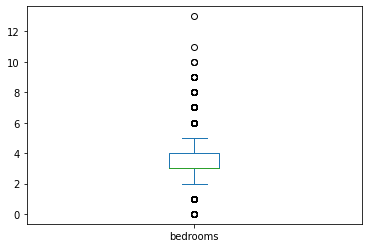

In [50]:
kchd_df1['bedrooms'].plot(kind='box')

In [51]:
kchd_df1['bedrooms'].mean() +3* kchd_df1['bedrooms'].std()

6.3759725057472565

In [52]:
kchd_df1=kchd_df1[kchd_df1.bedrooms<=6]
kchd_df1['bedrooms'].value_counts()

3    12036
4     9250
2     3509
5     2728
6      484
1      370
0       38
Name: bedrooms, dtype: int64

In [53]:
len(kchd_df1['floors'])

28415

<AxesSubplot:>

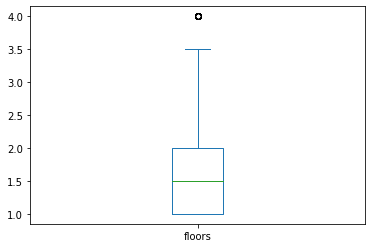

In [54]:
# check the outlier of floors
kchd_df1['floors'].plot(kind='box')

In [55]:
# find out the min and max floors plot and calculate the 3 std
kchd_df1['floors'].mean() +3 *kchd_df1['floors'].std()

3.162022388299068

In [56]:
kchd_df1=kchd_df1[kchd_df1.floors<4]
kchd_df1['floors'].value_counts()

1.0    13583
2.0    11349
1.5     2392
3.0      862
2.5      195
3.5        8
Name: floors, dtype: int64

In [57]:
# value count of bathroom 
kchd_df1['bathrooms'].value_counts()

2.5     7917
2.0     6791
1.0     4456
3.0     3948
3.5     2112
1.5     1727
4.0      603
4.5      504
5.0      131
5.5       96
6.0       35
0.0       23
6.5       22
7.0        9
7.5        6
0.5        5
8.0        2
9.5        1
10.5       1
Name: bathrooms, dtype: int64

<AxesSubplot:>

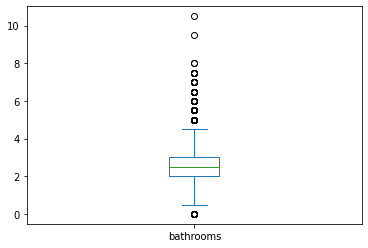

In [58]:
# visulize the outlier of bathrooms
kchd_df1['bathrooms'].plot(kind='box')

In [59]:
# calculate the mean 3 times std
kchd_df1['bathrooms'].mean() +3 * kchd_df1['bathrooms'].std()

4.9779722337199175

In [60]:
kchd_df1=kchd_df1[kchd_df1.bathrooms<=5]
kchd_df1['bathrooms'].value_counts()

2.5    7917
2.0    6791
1.0    4456
3.0    3948
3.5    2112
1.5    1727
4.0     603
4.5     504
5.0     131
0.0      23
0.5       5
Name: bathrooms, dtype: int64

<AxesSubplot:>

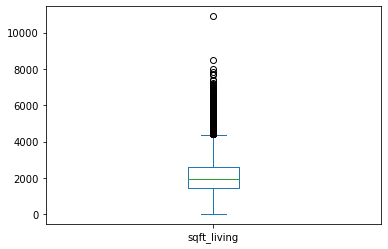

In [61]:
kchd_df1['sqft_living'].plot(kind='box')

In [62]:
# value count of sqft_living th
kchd_df1['sqft_living'].value_counts()

1560    180
1400    176
1900    174
1480    168
1540    167
       ... 
3571      1
3767      1
2491      1
1556      1
4825      1
Name: sqft_living, Length: 1134, dtype: int64

In [63]:
kchd_df1=kchd_df1[kchd_df1.sqft_living<5000]

In [64]:
# find value count of sqft_lot
kchd_df1['sqft_lot'].value_counts()

5000     472
6000     392
4000     370
7200     286
7500     178
        ... 
20308      1
22588      1
29375      1
37002      1
11058      1
Name: sqft_lot, Length: 11613, dtype: int64

<AxesSubplot:>

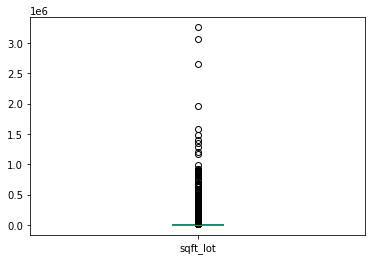

In [65]:
# visulizde the out
kchd_df1['sqft_lot'].plot(kind='box')

In [66]:
kchd_df1['sqft_lot'].min(),kchd_df1['sqft_lot'].max()

(402, 3253932)

In [67]:
kchd_df1.sqft_lot.mean()+3 * kchd_df1.sqft_lot.std()

195872.85492810508

In [68]:
kchd_df1=kchd_df1[kchd_df1.sqft_lot<2100000]

<AxesSubplot:>

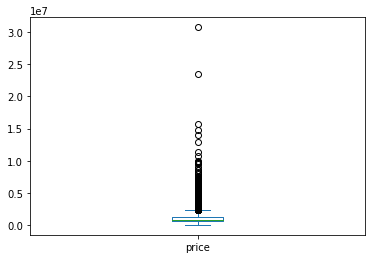

In [69]:
#vlean ourlier of 'Price'
kchd_df1['price'].plot(kind='box')

In [70]:
kchd_df1['price'].value_counts()

650000.0     326
750000.0     285
850000.0     283
800000.0     281
600000.0     275
            ... 
123186.0       1
2071217.0      1
122926.0       1
3155000.0      1
656500.0       1
Name: price, Length: 4872, dtype: int64

In [71]:
kchd_df1['price'].mean() +3 *kchd_df1['price'].std()

3338555.120196907

In [72]:
kchd_df1=kchd_df1[kchd_df1.price<3400000]

In [73]:
kchd_df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_age
count,2.761700e+04,27617.000000,27617.000000,27617.000000,2.761700e+04,27617.000000,27617.000000,27617.000000,27617.000000,27617.000000,27617.000000,27617.000000,27617.000000,27617.000000,27617.000000
mean,1.026987e+06,3.390267,2.274324,2054.271427,1.607958e+04,1.504508,1762.752037,467.792628,326.703914,207.195749,1973.269725,90.523084,47.546225,-122.213279,45.418872
std,5.603951e+05,0.920856,0.808867,836.099795,5.024614e+04,0.542538,780.584656,555.505986,276.564238,232.765504,31.615489,415.603650,0.144676,0.145320,31.000086
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,-1.000000
25%,6.450000e+05,3.000000,2.000000,1420.000000,5.000000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.438060,-122.331480,19.000000
50%,8.600000e+05,3.000000,2.500000,1910.000000,7.500000e+03,1.500000,1550.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.558580,-122.229545,43.000000
75%,1.279000e+06,4.000000,2.500000,2560.000000,1.042600e+04,2.000000,2220.000000,950.000000,510.000000,300.000000,2000.000000,0.000000,47.673660,-122.123790,67.000000
max,3.399888e+06,6.000000,5.000000,4990.000000,1.951712e+06,3.500000,5680.000000,4000.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,122.000000


In [74]:
preds_cols=[x for x in kchd_df1.columns if x not in['price','waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','selldate','zipcode','address']]
preds=kchd_df1[preds_cols]
target=kchd_df1.price

y=target
x=preds

model=sm.OLS(y,sm.add_constant(x))
results = model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     2462.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:17   Log-Likelihood:            -3.9355e+05
No. Observations:               27617   AIC:                         7.871e+05
Df Residuals:                   27602   BIC:                         7.872e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.839e+07   2.54e+06    -22.964      0.000   -6.34e+07   -5.34e+07
bedrooms      -5.189e+04   3333.277    -15.568      0.000   -5.84e+04   -4.54e+04
bathrooms      7.338e+04   4812.304     15.248      0.000    6.39e+04    8.28e+04
sqft_living     269.3329     10.755     25.042      0.000     248.252     290.414
sqft_lot          0.1878      0.047      3.992      0.000       0.096       0.280
floors        -7757.0217   6023.337     -1.288      0.198   -1.96e+04    4049.020
sqft_above      149.6108     10.961     13.650      0.000     128.127     171.094
sqft_basement    21.1369      7.975      2.650      0.008       5.505      36.769
sqft_garage      67.5672     11.189      6.039      0.000      45.636      89.498
sqft_patio      136.2582     10.595     12.861      0.000     115.492     157.024
yr_built       -393.7919    442.884     -0.889      0.374   -1261.867     474.283
yr_renovated     74.1846     14.092      5.264      0.000      46.563     101.806
lat            1.485e+06   1.64e+04     90.508      0.000    1.45e+06    1.52e+06
long           9.286e+04   1.87e+04      4.975      0.000    5.63e+04    1.29e+05
yr_age         1518.6920    445.007      3.413      0.001     646.456    2390.928
==============================================================================
Omnibus:                     5769.019   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23868.831
Skew:                           0.983   Prob(JB):                         0.00
Kurtosis:                       7.109   Cond. No.                     5.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

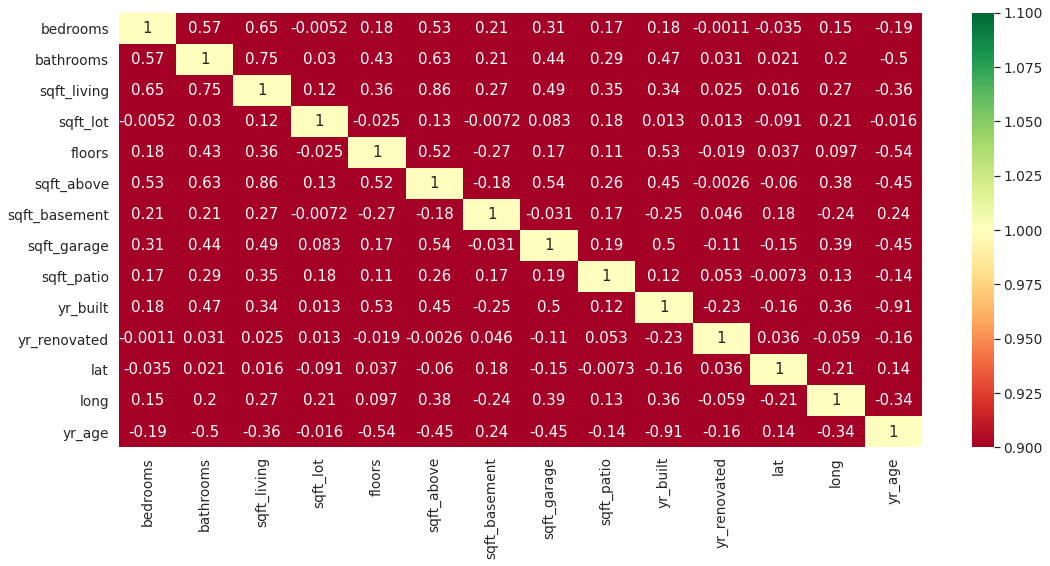

In [75]:
sns.set(font_scale=1.25)
plt.figure(figsize=(18,8))
sns.heatmap(x.corr(), annot=True, vmin=+1, cmap='RdYlGn');

In [76]:
# as per above model still the some cloum outlier need to clean because the zscore is very low.
# p value still some columns has more than 0.05.
# the coefficient value is 55% with all correlation columns

In [77]:
kchd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       27617 non-null  datetime64[ns]
 1   price          27617 non-null  float64       
 2   bedrooms       27617 non-null  int64         
 3   bathrooms      27617 non-null  float64       
 4   sqft_living    27617 non-null  int64         
 5   sqft_lot       27617 non-null  int64         
 6   floors         27617 non-null  float64       
 7   waterfront     27617 non-null  object        
 8   greenbelt      27617 non-null  object        
 9   nuisance       27617 non-null  object        
 10  view           27617 non-null  object        
 11  condition      27617 non-null  object        
 12  grade          27617 non-null  object        
 13  heat_source    27617 non-null  object        
 14  sewer_system   27617 non-null  object        
 15  sqft_above     2761

In [78]:
kchd_df1['view'].value_counts()

NONE         24533
AVERAGE       1741
GOOD           769
EXCELLENT      381
FAIR           193
Name: view, dtype: int64

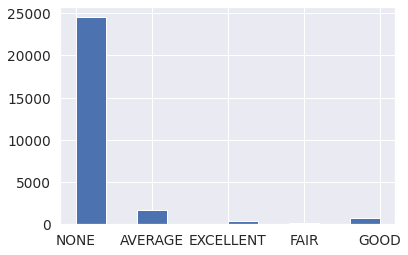

In [79]:
plt.hist(kchd_df1['view']);

In [80]:
kchd_df1['view']=kchd_df1.view.replace({'AVERAGE : YES','EXCELLENT : YES','FAIR : YES','GOOD : YES','NONE : NO'})

In [81]:
# as per above model still the some cloum outlier need to clean because the zscore is very low.
# p value still some columns has more than 0.05.
# the coefficient value is relate to each column in good position

In [82]:
# column need to clean outliner 
kchd_df1['yr_age'].min(),kchd_df1['yr_age'].max()

(-1, 122)

In [83]:
kchd_df1['yr_age'].mean() +3 * kchd_df1['yr_age'].std()

138.4191290932128

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3fe4bbac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3fe4c7220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3fe4bb730>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3fe4c7940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3fe4c7cd0>],
 'means': []}

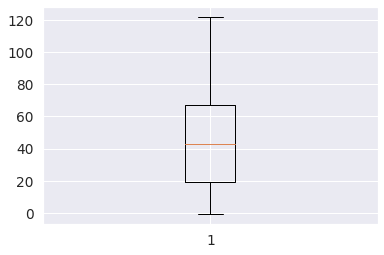

In [84]:
plt.boxplot(kchd_df1.yr_age)

In [85]:
kchd_df1 = kchd_df1[(kchd_df1.yr_age <= 123)]

In [86]:
kchd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       27617 non-null  datetime64[ns]
 1   price          27617 non-null  float64       
 2   bedrooms       27617 non-null  int64         
 3   bathrooms      27617 non-null  float64       
 4   sqft_living    27617 non-null  int64         
 5   sqft_lot       27617 non-null  int64         
 6   floors         27617 non-null  float64       
 7   waterfront     27617 non-null  object        
 8   greenbelt      27617 non-null  object        
 9   nuisance       27617 non-null  object        
 10  view           27617 non-null  object        
 11  condition      27617 non-null  object        
 12  grade          27617 non-null  object        
 13  heat_source    27617 non-null  object        
 14  sewer_system   27617 non-null  object        
 15  sqft_above     2761

<AxesSubplot:>

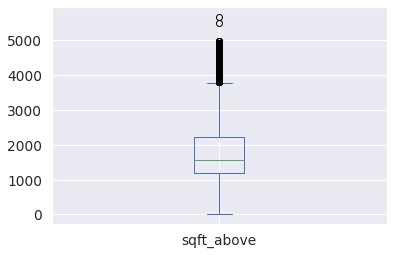

In [87]:
kchd_df1['sqft_above'].plot(kind='box')

In [88]:
kchd_df1['sqft_above'].min(),kchd_df1['sqft_above'].max()

(2, 5680)

In [89]:
kchd_df1['sqft_above'].mean() +3 * kchd_df1['sqft_above'].std()

4104.506003844288

In [90]:
kchd_df1['sqft_basement']

0           0
1        1570
2        1580
3        1070
4         550
         ... 
30150    1130
30151       0
30152     920
30153     740
30154       0
Name: sqft_basement, Length: 27617, dtype: int64

In [91]:
kchd_df1['sqft_basement'].min(), kchd_df1['sqft_basement'].max()

(0, 4000)

In [92]:
kchd_df1['sqft_basement'].mean() +3 * kchd_df1['sqft_basement'].std()

2134.3105862842212

<AxesSubplot:>

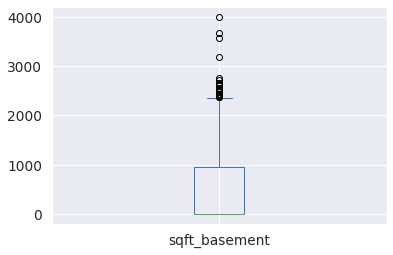

In [93]:
kchd_df1['sqft_basement'].plot(kind='box')

In [94]:
kchd_df['sqft_garage']

0          0
1          0
2          0
3        200
4        550
        ... 
30150      0
30151      0
30152    240
30153    480
30154    420
Name: sqft_garage, Length: 30111, dtype: int64

In [95]:
kchd_df1['sqft_garage'].min(), kchd_df1['sqft_garage'].max()

(0, 3580)

In [96]:
kchd_df1['sqft_garage'].mean() +3 * kchd_df1['sqft_garage'].std()

1156.3966293997423

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3fe3eef10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3fe37c670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3fe3eeb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3fe37cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3fe38c160>],
 'means': []}

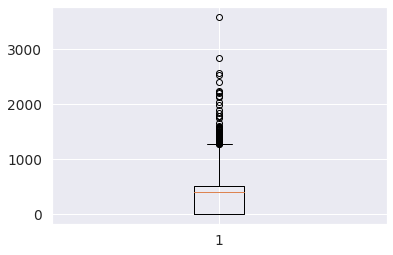

In [97]:
plt.boxplot(kchd_df1.sqft_garage)

In [98]:
kchd_df1['sqft_patio']

0         40
1        240
2          0
3        270
4         30
        ... 
30150    210
30151    520
30152    110
30153    100
30154      0
Name: sqft_patio, Length: 27617, dtype: int64

In [99]:
kchd_df1['sqft_patio'].min(), kchd_df1['sqft_patio'].max()

(0, 4370)

In [100]:
kchd_df1['sqft_patio'].mean() +3 * kchd_df1['sqft_patio'].std()

905.492261783357

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3fe557e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3fe5571f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3fe557f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3fe516880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3fe563ca0>],
 'means': []}

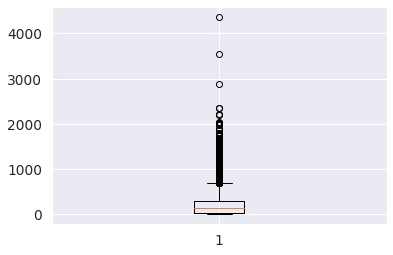

In [101]:
plt.boxplot(kchd_df1.sqft_patio)

In [102]:
kchd_df1 = kchd_df1[(kchd_df1.sqft_above < 5000)&(kchd_df1.sqft_basement < 3000)&(kchd_df1.sqft_garage < 1500)&(kchd_df1.sqft_patio < 1000)]
kchd_df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_age
count,2.728600e+04,27286.000000,27286.000000,27286.000000,2.728600e+04,27286.000000,27286.000000,27286.000000,27286.000000,27286.000000,27286.000000,27286.000000,27286.000000,27286.000000,27286.000000
mean,1.021551e+06,3.386792,2.267738,2042.679249,1.526823e+04,1.504086,1753.531115,464.359122,323.154145,195.281023,1973.195778,89.571539,47.546423,-122.214239,45.505058
std,5.561374e+05,0.920633,0.807181,828.558425,4.694506e+04,0.542843,774.122512,550.762027,269.074614,201.797269,31.708060,413.519320,0.144524,0.144818,31.098768
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,-1.000000
25%,6.400000e+05,3.000000,2.000000,1420.000000,5.000000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1951.000000,0.000000,47.438870,-122.331849,19.000000
50%,8.566290e+05,3.000000,2.500000,1900.000000,7.440000e+03,1.500000,1540.000000,0.000000,400.000000,140.000000,1975.000000,0.000000,47.558800,-122.231830,43.000000
75%,1.270000e+06,4.000000,2.500000,2550.000000,1.028975e+04,2.000000,2200.000000,940.000000,500.000000,300.000000,2000.000000,0.000000,47.673720,-122.125625,67.000000
max,3.399888e+06,6.000000,5.000000,4990.000000,1.951712e+06,3.500000,4990.000000,2750.000000,1490.000000,990.000000,2022.000000,2022.000000,47.789830,-121.163960,122.000000


In [103]:
preds_cols=[x for x in kchd_df1.columns if x not in['price','waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','selldate','zipcode','address','yr_age']]
preds=kchd_df1[preds_cols]
target=kchd_df1.price

y=target
x=preds

model=sm.OLS(y,sm.add_constant(x))
results = model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     2612.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:20   Log-Likelihood:            -3.8864e+05
No. Observations:               27286   AIC:                         7.773e+05
Df Residuals:                   27272   BIC:                         7.774e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.544e+07   2.41e+06    -23.009      0.000   -6.02e+07   -5.07e+07
bedrooms      -5.184e+04   3335.029    -15.545      0.000   -5.84e+04   -4.53e+04
bathrooms      7.182e+04   4810.134     14.932      0.000    6.24e+04    8.13e+04
sqft_living     264.6593     10.869     24.349      0.000     243.355     285.964
sqft_lot          0.2500      0.050      5.019      0.000       0.152       0.348
floors         -1.01e+04   6012.870     -1.680      0.093   -2.19e+04    1685.041
sqft_above      154.3309     11.101     13.902      0.000     132.572     176.090
sqft_basement    21.1826      8.072      2.624      0.009       5.362      37.004
sqft_garage      74.6666     11.598      6.438      0.000      51.933      97.400
sqft_patio      171.9414     12.092     14.220      0.000     148.241     195.641
yr_built      -1938.7053    109.827    -17.652      0.000   -2153.971   -1723.440
yr_renovated     26.7870      5.725      4.679      0.000      15.566      38.008
lat            1.487e+06   1.64e+04     90.591      0.000    1.46e+06    1.52e+06
long           9.242e+04   1.87e+04      4.938      0.000    5.57e+04    1.29e+05
==============================================================================
Omnibus:                     5884.827   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24300.269
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       7.153   Cond. No.                     5.29e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# After again cleaning data and clear the outlier the coefficent is 55% with all variable.
# zscore increse by 30% and p-value total below 0.5 

In [104]:
kchd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27286 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       27286 non-null  datetime64[ns]
 1   price          27286 non-null  float64       
 2   bedrooms       27286 non-null  int64         
 3   bathrooms      27286 non-null  float64       
 4   sqft_living    27286 non-null  int64         
 5   sqft_lot       27286 non-null  int64         
 6   floors         27286 non-null  float64       
 7   waterfront     27286 non-null  object        
 8   greenbelt      27286 non-null  object        
 9   nuisance       27286 non-null  object        
 10  view           27286 non-null  object        
 11  condition      27286 non-null  object        
 12  grade          27286 non-null  object        
 13  heat_source    27286 non-null  object        
 14  sewer_system   27286 non-null  object        
 15  sqft_above     2728

In [105]:
cat_columns = ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system']
dummy_kchd_df1=pd.get_dummies(data=kchd_df1, columns=cat_columns, drop_first=True)

In [106]:
X=dummy_kchd_df1.drop(labels=['selldate','price','zipcode','address','nuisance_YES','heat_source_Electricity/Solar',
                                'greenbelt_YES','grade_2 Substandard','heat_source_Oil','heat_source_Oil/Solar',
                               'heat_source_Other','sewer_system_PUBLIC RESTRICTED','sewer_system_PRIVATE RESTRICTED'],axis=1)
y=dummy_kchd_df1.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1410.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:20   Log-Likelihood:            -3.8609e+05
No. Observations:               27286   AIC:                         7.722e+05
Df Residuals:                   27252   BIC:                         7.725e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.622e+07   2.45e+06    -14.779      0.000    -4.1e+07   -3.14e+07
bedrooms                -5552.6316   3151.873     -1.762      0.078   -1.17e+04     625.200
bathrooms                5.383e+04   4451.698     12.092      0.000    4.51e+04    6.26e+04
sqft_living               119.1152     10.156     11.729      0.000      99.210     139.021
sqft_lot                    0.3654      0.049      7.509      0.000       0.270       0.461
floors                  -4.414e+04   5634.334     -7.833      0.000   -5.52e+04   -3.31e+04
sqft_above                129.0620     10.334     12.489      0.000     108.807     149.317
sqft_basement              30.7693      7.532      4.085      0.000      16.006      45.532
sqft_garage               -28.0002     10.927     -2.562      0.010     -49.418      -6.582
sqft_patio                 69.5635     11.318      6.146      0.000      47.379      91.748
yr_built                 -429.1762    407.249     -1.054      0.292   -1227.405     369.052
yr_renovated               82.8751     13.049      6.351      0.000      57.299     108.451
lat                      1.387e+06   1.55e+04     89.474      0.000    1.36e+06    1.42e+06
long                      2.28e+05   1.78e+04     12.789      0.000    1.93e+05    2.63e+05
yr_age                   1465.2520    411.248      3.563      0.000     659.185    2271.319
waterfront_YES           1.092e+05   2.15e+04      5.074      0.000     6.7e+04    1.51e+05
view_EXCELLENT           3.334e+05   2.14e+04     15.592      0.000    2.91e+05    3.75e+05
view_FAIR                9.725e+04   2.59e+04      3.752      0.000    4.64e+04    1.48e+05
view_GOOD                6.991e+04   1.51e+04      4.643      0.000    4.04e+04    9.94e+04
view_NONE               -8.904e+04   8800.920    -10.118      0.000   -1.06e+05   -7.18e+04
condition_Average       -8.893e+04   4849.873    -18.337      0.000   -9.84e+04   -7.94e+04
condition_Below Average -1.352e+05   2.11e+04     -6.409      0.000   -1.77e+05   -9.39e+04
grade_11 Excellent       1.329e+05   2.67e+04      4.978      0.000    8.06e+04    1.85e+05
grade_12 Luxury          3.062e+05   8.05e+04      3.802      0.000    1.48e+05    4.64e+05
grade_3 Poor            -7.979e+05   1.22e+05     -6.546      0.000   -1.04e+06   -5.59e+05
grade_4 Low             -6.853e+05   5.56e+04    -12.326      0.000   -7.94e+05   -5.76e+05
grade_5 Fair            -7.193e+05   2.37e+04    -30.303      0.000   -7.66e+05   -6.73e+05
grade_6 Low Average     -7.557e+05   1.62e+04    -46.683      0.000   -7.87e+05   -7.24e+05
grade_7 Average          -7.09e+05   1.36e+04    -51.983      0.000   -7.36e+05   -6.82e+05
grade_8 Good            -5.644e+05   1.24e+04    -45.409      0.000   -5.89e+05    -5.4e+05
grade_9 Better          -2.948e+05   1.24e+04  

### Final Model

In [108]:
## Use pd.get dummies to dummify categorial variables
cat_columns = ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system']
dummy1_kchd_df1=pd.get_dummies(data=kchd_df1, columns=cat_columns, drop_first=True)

In [109]:
dummy1_kchd_df1.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'yr_age',
       'zipcode', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Average', 'condition_Below Average', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [110]:
# running our model with dummified predictors
X=dummy1_kchd_df1.drop(labels=['selldate','price','zipcode','address','sewer_system_PUBLIC RESTRICTED','heat_source_Other',
                                'heat_source_Oil/Solar','heat_source_Oil','heat_source_Electricity/Solar',
                                'nuisance_YES','grade_2 Substandard','sewer_system_PRIVATE RESTRICTED',
                                'greenbelt_YES','view_GOOD','heat_source_Gas/Solar','yr_built'],axis=1)
y=dummy1_kchd_df1.price

second_dummy_model = sm.OLS(y,sm.add_constant(X))
results1 = second_dummy_model.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:20   Log-Likelihood:            -3.8611e+05
No. Observations:               27286   AIC:                         7.723e+05
Df Residuals:                   27255   BIC:                         7.725e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Conclution: After all data cleaning and filtering outlier zscore is 630 and p-value almost below 0.05
# so all coefficient is 63% as per data filteration

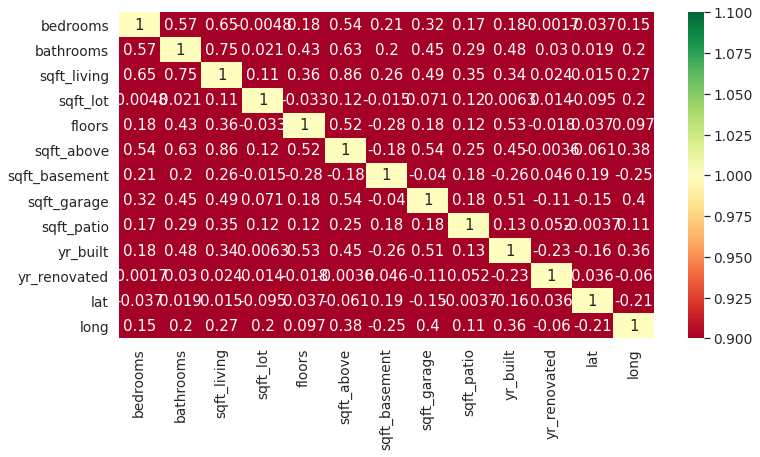

In [111]:
sns.set(font_scale=1.25)
plt.figure(figsize=(12,6))
sns.heatmap(x.corr(), annot=True, vmin=+1, cmap='RdYlGn');

In [112]:
kchd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27286 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       27286 non-null  datetime64[ns]
 1   price          27286 non-null  float64       
 2   bedrooms       27286 non-null  int64         
 3   bathrooms      27286 non-null  float64       
 4   sqft_living    27286 non-null  int64         
 5   sqft_lot       27286 non-null  int64         
 6   floors         27286 non-null  float64       
 7   waterfront     27286 non-null  object        
 8   greenbelt      27286 non-null  object        
 9   nuisance       27286 non-null  object        
 10  view           27286 non-null  object        
 11  condition      27286 non-null  object        
 12  grade          27286 non-null  object        
 13  heat_source    27286 non-null  object        
 14  sewer_system   27286 non-null  object        
 15  sqft_above     2728

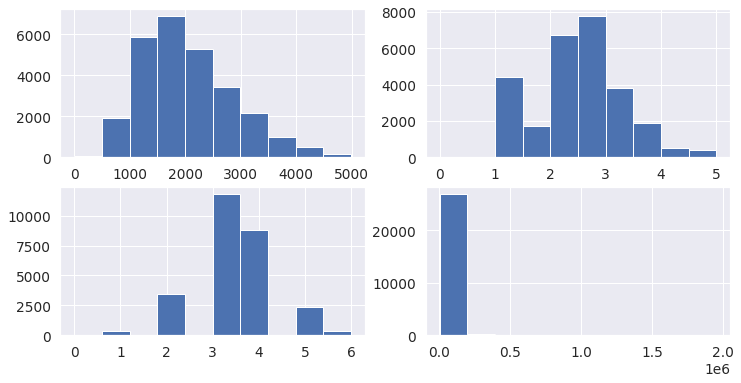

In [127]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(12,6))
ax1.hist(kchd_df1.sqft_living)
ax2.hist(kchd_df1.bathrooms)
ax3.hist(kchd_df1.bedrooms)
ax4.hist(kchd_df1.sqft_lot);

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion